# Exercises 24 February 2021

## Personal networks, ego networks

<mark> Remarque : les exercices à faire pour le 02 mars sont plus bas dans le fichier après le sous-titre "Homework". Le haut du fichier correspond au TP effectué en classe, commenté. </mark>

On s'intéresse cette fois-ci à un réseau concentré contrairement aux réseaux complets que nous avions vus auparavant. 

In [1]:
########### Preparation ##############
# import packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# use pandas to import list of nodes with attributes
nodes = pd.read_table('Ego210_Nodes.txt', sep='\t')
nodes.head()

,ID,Qualification,Gender,Multiplexity,Support,Proximity
0,210,1,1,3,2,4
1,25,2,1,1,1,1
2,27,2,1,3,1,2
3,28,2,1,2,1,1
4,31,2,1,1,1,2


La première ligne de la table est "Ego", c'est-à-dire l'individu **210**. 

Les différents **attributs de la table des noeuds** sont les suivants d'après le Codebook du réseau : 

- `Qualification` : en 6 catégories (1: partenaire / 2: ami / 3: membre de la famille / 4: collègue de travail / 5: professionnel de santé / 6: autre)  
- `Genre` : (1: femme / 2: homme) 
- `Multiplexity` : la manière dont la personne est en contact avec Ego (1: seulement en face à face / 2: seulement en ligne / 3: en ligne et face à face)
- `Support` : si la personne pourrait fournir du soutien à Ego (1: non / 2: oui)
- `Proximity` : intensité de proximité (1: Peu proche / 2: Proche / 3: Très proche / 4: Intime)

**Remarque** : Ces variables pourraient potentiellement être intéressantes pour représenter la force des liens. 

In [3]:
# Let's select Ego
ego = nodes[nodes.ID==210]
print(ego)

    ID  Qualification  Gender  Multiplexity  Support  Proximity
0  210              1       1             3        2          4


In [4]:
# Select alters 
alters = nodes[nodes.ID != 210]
alters.head()

,ID,Qualification,Gender,Multiplexity,Support,Proximity
1,25,2,1,1,1,1
2,27,2,1,3,1,2
3,28,2,1,2,1,1
4,31,2,1,1,1,2
5,33,2,1,2,1,1


In [5]:
# use pandas to import edgelist as a table
EgoEdges = pd.read_table('Ego210_Edges.txt', sep=',')
EgoEdges.head()

,V1,V2,Type
0,210,25,1
1,210,27,1
2,210,31,1
3,210,34,1
4,210,35,1


On va créer un graphe Ego210. 

Les différents **attributs de la table des liens** sont les suivants d'après le Codebook du réseau : 
- `V1` et `V2` correspondent aux deux noeuds reliés dans le réseau. 
- `Type` : type de lien (1: face à face / 2: en ligne)

Les liens ne sont pas orientés comme bien souvent dans les réseaux qualifiés de personnels. 

C'est un `MultiGraph` qui permet d'introduire des liens de types différents, ou, même si ce n'est pas le cas ici, d'introduire des liens vers soi-même (*loops*). 

**Remarque** : l'attribut `edge_attr = 'Type'` ajoute l'attribut type afin de garder la double nature des liens. 

In [6]:
# generate graph from pandas edgelist
# it is an undirected multigraph
# a 'multigraph' accepts multiple types of ties (here, online and offline)

Ego210 = nx.from_pandas_edgelist(EgoEdges, 'V1', 'V2', edge_attr ='Type', create_using=nx.MultiGraph()) 
print(nx.info(Ego210))

Name: 
Type: MultiGraph
Number of nodes: 51
Number of edges: 114
Average degree:   4.4706


**Remarque** : Si on l'avait chargé comme graphe normal, ce qui change c'est le nombre d'*edges* qui diminue. Il y en a désormais 71 au lieu de 114. 

In [7]:
# Note: if we had created it as a simple undirected graph, networkx would have omitted multiple ties
test = nx.from_pandas_edgelist(EgoEdges, 'V1', 'V2', create_using=nx.Graph()) 
print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 71
Average degree:   2.7843


Revenons à nos données de MultiGraph.

In [8]:
# match nodes of graph with attributes of nodes
NodeData = nodes.set_index('ID').to_dict('index').items()
Ego210.add_nodes_from(NodeData)

# view results
print(Ego210.nodes(data=True))

[(210, {'Qualification': 1, 'Gender': 1, 'Multiplexity': 3, 'Support': 2, 'Proximity': 4}), (25, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 1, 'Support': 1, 'Proximity': 1}), (27, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (31, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 1, 'Support': 1, 'Proximity': 2}), (34, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (35, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (39, {'Qualification': 4, 'Gender': 1, 'Multiplexity': 3, 'Support': 2, 'Proximity': 2}), (95, {'Qualification': 1, 'Gender': 2, 'Multiplexity': 3, 'Support': 2, 'Proximity': 3}), (106, {'Qualification': 2, 'Gender': 2, 'Multiplexity': 3, 'Support': 1, 'Proximity': 3}), (110, {'Qualification': 4, 'Gender': 2, 'Multiplexity': 3, 'Support': 1, 'Proximity': 1}), (112, {'Qualification': 6, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 1}), (124,

In [9]:
# view edges
print(Ego210.edges(data=True))

[(210, 25, {'Type': 1}), (210, 27, {'Type': 1}), (210, 27, {'Type': 2}), (210, 31, {'Type': 1}), (210, 34, {'Type': 1}), (210, 34, {'Type': 2}), (210, 35, {'Type': 1}), (210, 35, {'Type': 2}), (210, 39, {'Type': 1}), (210, 39, {'Type': 2}), (210, 95, {'Type': 1}), (210, 95, {'Type': 2}), (210, 106, {'Type': 1}), (210, 106, {'Type': 2}), (210, 110, {'Type': 1}), (210, 110, {'Type': 2}), (210, 112, {'Type': 1}), (210, 112, {'Type': 2}), (210, 124, {'Type': 1}), (210, 124, {'Type': 2}), (210, 132, {'Type': 1}), (210, 132, {'Type': 2}), (210, 140, {'Type': 1}), (210, 140, {'Type': 2}), (210, 260, {'Type': 1}), (210, 260, {'Type': 2}), (210, 270, {'Type': 1}), (210, 290, {'Type': 1}), (210, 317, {'Type': 1}), (210, 317, {'Type': 2}), (210, 320, {'Type': 1}), (210, 330, {'Type': 1}), (210, 330, {'Type': 2}), (210, 340, {'Type': 1}), (210, 340, {'Type': 2}), (210, 350, {'Type': 1}), (210, 350, {'Type': 2}), (210, 360, {'Type': 1}), (210, 370, {'Type': 1}), (210, 370, {'Type': 2}), (210, 410, 

Nous utilisons désormais un mode de visualisation particulier, un peu plus complexe que d'habitude, car un simple `nx.draw` ne permet pas de visualiser les double liens. Nous utilisons une disposition des noeuds en `spring_layout`. Les liens doubles sont représentés courbés. 

Le **noeud 210** est placé automatiquement au centre par l'algorithme car il correspond à celui qui a le plus de lien (en tant que noeud *Ego*). 

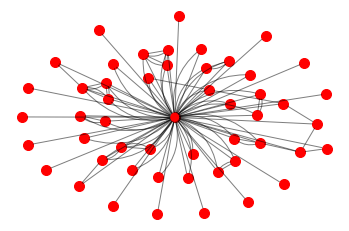

In [10]:
# Visualization

# define layout
pos = nx.spring_layout(Ego210, seed=1)
# draw nodes according to layoabsut
nx.draw_networkx_nodes(Ego210, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", #multi-graph but not oriented
                                color='black',
                                alpha=0.5,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                #arc3,rad=rrr : permet de faire des courbes plutôt que des lignes
                                #au lieu de donner une même valeur pour toutes les courbes, je donne
                                #une valeur différente pour type 1 et type 2. 
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),
                                ),
                )
plt.axis('off')
plt.show()

Faisons le même graphique en distinguant les liens selon leur type (bleu de type 1 offline et vert de type 2 online). 

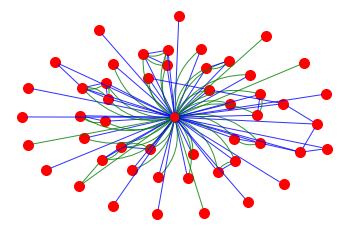

In [11]:
# Visualization with differences by types

#Colors : blue for offline and green for online
edge_color = []
for edge in list(Ego210.edges(data=True)):
    if list(edge[2].values())==[1]:
        edge_color.append('blue')
    else:
        edge_color.append('green')
        
# keep the same layout as before ("pos") to compare
# draw nodes according to layoabsut
nx.draw_networkx_nodes(Ego210, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()


for i in range(len(Ego210.edges)):
    e = list(Ego210.edges)[i]
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", #multi-graph but not oriented
                                color=edge_color[i],
                                alpha=0.8,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                #arc3,rad=rrr : permet de faire des courbes plutôt que des lignes
                                #au lieu de donner une même valeur pour toutes les courbes, je donne
                                #une valeur différente pour type 1 et type 2. 
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),
                                ),
                )
plt.axis('off')
plt.show()

## Subset graph: offline-only, online-only, without Ego

##### Offline ties

Je me restreins ici au sous-graphe des liens de type 1 (offline). 

In [12]:
## Subset graph: take only offline ties

# take subset of relevant edges
offline = [(u, v) for (u, v, d) in Ego210.edges(data=True) if d["Type"] ==1]

# create graph
Ego210Offline = nx.Graph(offline)
print(nx.info(Ego210Offline))

Name: 
Type: Graph
Number of nodes: 46
Number of edges: 65
Average degree:   2.8261


On l'associe avec notre liste initiale de noeuds pour considérer les noeuds isolés, ce qui permet de comparer avec les noeuds d'origine. 

In [13]:
# match with nodes table to add isolates
Ego210Offline.add_nodes_from(NodeData)

# view results
print(nx.info(Ego210Offline))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 65
Average degree:   2.5490


Les liens sont moins nombreux et il n'existe plus de noeud double. 

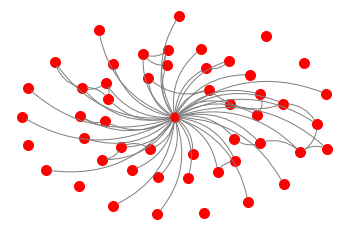

In [15]:
# Visualization

# keep the same layout as before ("pos") to compare
# draw nodes according to this layout
nx.draw_networkx_nodes(Ego210Offline, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210Offline.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-",
                                color='gray',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3"),
                                )
plt.axis('off')
plt.show()

##### Exercise: now, repeat the same for online ties

Nous réitérons la procédure en nous restreignant au sous-graphe des liens de type 2 (online). 

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 49
Average degree:   2.7222
Name: 
Type: Graph
Number of nodes: 51
Number of edges: 49
Average degree:   1.9216


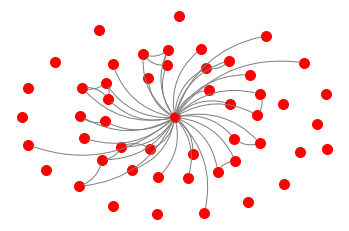

In [16]:
## Subset graph: take only offline ties

# take subset of relevant edges
online = [(u, v) for (u, v, d) in Ego210.edges(data=True) if d["Type"] ==2]

# create graph
Ego210Online = nx.Graph(online)
print(nx.info(Ego210Online))

# match with nodes table to add isolates
Ego210Online.add_nodes_from(NodeData)

# view results
print(nx.info(Ego210Online))

# Visualization

# keep the same layout as before ("pos") to compare
# draw nodes according to this layout
nx.draw_networkx_nodes(Ego210Online, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210Online.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-",
                                color='gray',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3"),
                                )
plt.axis('off')
plt.show()

##### Remove Ego from the graph

Afin d'améliorer la visualisation, nous refaisons le graphe sans Ego car Ego a des relations avec tout le monde, ce qui correspond à une information redondante. Pour cela, nous faisons une copie du graphe précédent pour commencer. 

In [17]:
# Graph without Ego
Ego210_noEgo = Ego210.copy()
Ego210_noEgo.remove_node(210)
# View results
print(nx.info(Ego210_noEgo))

Name: 
Type: MultiGraph
Number of nodes: 50
Number of edges: 34
Average degree:   1.3600


La densité est faible et peut s'interpréter de deux manières : 

1.  Les personnes qui ont des soucis de santé préfèrent probablement garder des relations séparées pour que lleurs contacts ne puissent pas parler entre eux. C'est une sorte de protection. 

2. Il y a aussi un sujet de méthode. Dans l'enquête, on demande à Ego qui sont ses alters (formulé bien sûr autrement) et les relations entre ses alters. Il est aussi possible qu'Ego ne connaisse pas toutes les relations de ses alters et sous-estime les liens entre ces derniers. 

##### Exercise: now, visualize it with the same layout as Ego210

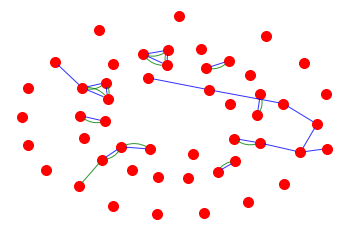

In [18]:
# Visualization with differences by types

#Colors : blue for offline and green for online
edge_color = []
for edge in list(Ego210_noEgo.edges(data=True)):
    if list(edge[2].values())==[1]:
        edge_color.append('blue')
    else:
        edge_color.append('green')
        
# keep the same layout as before ("pos") to compare
# draw nodes according to layoabsut
nx.draw_networkx_nodes(Ego210_noEgo, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()


for i in range(len(Ego210_noEgo.edges)):
    e = list(Ego210_noEgo.edges)[i]
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", #multi-graph but not oriented
                                color=edge_color[i],
                                alpha=0.8,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                #arc3,rad=rrr : permet de faire des courbes plutôt que des lignes
                                #au lieu de donner une même valeur pour toutes les courbes, je donne
                                #une valeur différente pour type 1 et type 2. 
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),
                                ),
                )
plt.axis('off')
plt.show()

##### Weighted graph

L'intérêt de pondérer le graphe est d'analyser la force des liens, par exemple quand le lien est double (en ligne et hors ligne). Même si bien sûr, en tant de Covid, cette interprétation n'est pas forcément la bonne ! On va donc transformer le graphe avec cette idée en tête. 

Le nouveau graph est composé de **51 noeuds** (dont Ego) et de **71 liens** (nombre de liens uniques de `test`). 

L'attribut `weight` du nouveau graphe vaut 1 si le lien apparaît une fois et 2 s'il apparaît 2 fois. 

In [19]:
## Create weighted undirected graph from multigraph
# Idea : each tie has value 2 if it is both online and offline, 1 otherwise
# We can interpret multiplexity as tie strength

Ego210WUG = nx.Graph()

for u,v,data in Ego210.edges(data=True):
    w = 1   
    if Ego210WUG.has_edge(u,v):
        Ego210WUG[u][v]['weight'] += w
    else:
        Ego210WUG.add_edge(u, v, weight=w)

print(nx.info(Ego210WUG))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 71
Average degree:   2.7843


In [20]:
print(Ego210WUG.edges(data=True))

[(210, 25, {'weight': 1}), (210, 27, {'weight': 2}), (210, 31, {'weight': 1}), (210, 34, {'weight': 2}), (210, 35, {'weight': 2}), (210, 39, {'weight': 2}), (210, 95, {'weight': 2}), (210, 106, {'weight': 2}), (210, 110, {'weight': 2}), (210, 112, {'weight': 2}), (210, 124, {'weight': 2}), (210, 132, {'weight': 2}), (210, 140, {'weight': 2}), (210, 260, {'weight': 2}), (210, 270, {'weight': 1}), (210, 290, {'weight': 1}), (210, 317, {'weight': 2}), (210, 320, {'weight': 1}), (210, 330, {'weight': 2}), (210, 340, {'weight': 2}), (210, 350, {'weight': 2}), (210, 360, {'weight': 1}), (210, 370, {'weight': 2}), (210, 410, {'weight': 2}), (210, 411, {'weight': 2}), (210, 420, {'weight': 1}), (210, 430, {'weight': 1}), (210, 440, {'weight': 1}), (210, 450, {'weight': 1}), (210, 511, {'weight': 2}), (210, 729, {'weight': 1}), (210, 828, {'weight': 2}), (210, 1620, {'weight': 2}), (210, 1719, {'weight': 2}), (210, 1815, {'weight': 1}), (210, 1916, {'weight': 1}), (210, 2113, {'weight': 2}), (2

Afin de visualiser intuitivement les résultats, nous représentons les liens doubles par des segments plus épais que pour les liens faibles.

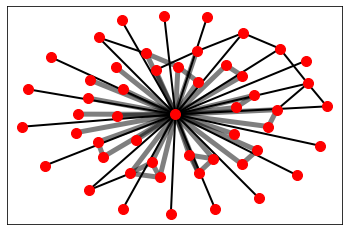

In [21]:
# Visualization

strongTies = [(u, v) for (u, v, d) in Ego210WUG.edges(data=True) if d["weight"] > 1]
weakTies = [(u, v) for (u, v, d) in Ego210WUG.edges(data=True) if d["weight"] <= 1]

pos = nx.spring_layout(Ego210WUG)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Ego210WUG, pos, node_color = 'r', node_size = 100, alpha = 1)

# edges
nx.draw_networkx_edges(Ego210WUG, pos, edgelist=strongTies, width=5, alpha=0.5)  # strong ties
nx.draw_networkx_edges(Ego210WUG, pos, edgelist=weakTies, width=2, alpha=1) # weak ties


## Personal network composition indicators

In [22]:
## Blau index

# recall it is equal to 1 - p1^2 - p2^2 - ... - pk^2

# first create a function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())

# then apply it to the 'alters' table, attribute 'Qualification'
blau(alters, 'Qualification')

0.6624

In [23]:
# NB if you need to see how many/ which categories are represented in a categorical variables
print (alters['Qualification'].unique())

[2 4 1 6 3 5]


In [24]:
# Index of Qualitative Variation
# equal to Blau * k/(k-1)
# (normalized version)
k = len(list(alters['Qualification'].unique()))
print("k :",k)
blau(alters, 'Qualification')*(k/(k-1))

k : 6


0.7948799999999999

In [26]:
# Herfindahl-Hirschman index (HHI)
# equal to 1 - Blau
1 - blau(alters, 'Qualification')

0.3376

#### Exercise: calculate these indexes for the other attributes (Gender, Multiplexity, Support and Proximity)

In [27]:
variables = ['Qualification','Gender','Multiplexity','Support','Proximity']

print('Blau index\n')
for var in variables:
    print(var,": ",blau(alters, var))
    
print('\nIndex of Qualitative Variation\n')
for var in variables:
    k = len(list(alters[var].unique()))
    blau(alters, var)*(k/(k-1))
    print(var,"(k =",k,") :",blau(alters, var)*(k/(k-1)))
    
print('\nHerfindahl-Hirschman index \n')
for var in variables:
    print(var,": ",1 - blau(alters, var))

Blau index

Qualification :  0.6624
Gender :  0.4872000000000001
Multiplexity :  0.54
Support :  0.4351999999999999
Proximity :  0.5751999999999999

Index of Qualitative Variation

Qualification (k = 6 ) : 0.7948799999999999
Gender (k = 2 ) : 0.9744000000000002
Multiplexity (k = 3 ) : 0.81
Support (k = 2 ) : 0.8703999999999998
Proximity (k = 3 ) : 0.8627999999999999

Herfindahl-Hirschman index 

Qualification :  0.3376
Gender :  0.5127999999999999
Multiplexity :  0.45999999999999996
Support :  0.5648000000000001
Proximity :  0.42480000000000007


**Remarque** : Pour `Proximity`, $k = 3$ et non $4$ car la classe $4$ (Intime) non concerne que l'individu ego et non les alters. 

## Structural measures

In [28]:
# find isolates (components consisting in 1 node, for example in the offline-only network)
list(nx.isolates(Ego210Offline)) 

[28, 33, 153, 632, 2030]

In [29]:
# density (for ex. in the original Ego210 graph)
nx.density(Ego210) 

0.08941176470588236

In [30]:
# Transitivity (cannot do it in Ego210 because not implemented for MultiGraph type)
print(nx.transitivity(Ego210WUG)) 

0.053738317757009345


##### In principle, all structural measures can be calculated on a personal / ego network. Just be aware of graph type and relevance of each measure (par ex. reciprocity is not meaningful in un undirected graph).

<mark> Début des devoirs à faire pour le 02/03 </mark>

## Homework

##### Take the advice network of Lazega's lawyers.

##### Extract the ego-centred network of one of the lawyers i (i = 1,..., 71).
###### NB The networkx function to extract the ego graph of i is: Egoi = nx.ego_graph(G, i)

##### Describe the ego-network of lawyer i through composition indicators (Blau index etc.) for relevant attributes, and structure indicators (density etc.).

##### Bonus: repeat the exercise with the multigraph that results from combining advice, friendship and cowork.

##### Please email to paola.tubaro@lri.fr by Tuesday, March 2, 2pm.


## ELadvice only

In [32]:
# use pandas to import list of nodes with attributes
nodes = pd.read_table('ELnodeAttributes.txt', sep='\t')
nodes.head()

,Node,Status,Gender,Office,Senior,Age,Spec,School
0,1,1,1,1,31,64,1,1
1,2,1,1,1,32,62,2,1
2,3,1,1,2,13,67,1,1
3,4,1,1,1,31,59,2,3
4,5,1,1,2,31,59,1,2


Reminder : The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm. The attribute variables in the file ELattr.dat are:

    Node
    status (1=partner; 2=associate)
    gender (1=man; 2=woman)
    office (1=Boston; 2=Hartford; 3=Providence)
    years with the firm
    age
    practice (1=litigation; 2=corporate)
    law school (1: harvard, yale; 2: ucon; 3: other) 

In [105]:
# Let's select Ego
num_ego = 3
ego = nodes[nodes.Node== num_ego]
print(ego)

   Node  Status  Gender  Office  Senior  Age  Spec  School
2     3       1       1       2      13   67     1       1


In [106]:
# Select alters 
alters = nodes[nodes.Node != num_ego]
alters.head()

,Node,Status,Gender,Office,Senior,Age,Spec,School
0,1,1,1,1,31,64,1,1
1,2,1,1,1,32,62,2,1
3,4,1,1,1,31,59,2,3
4,5,1,1,2,31,59,1,2
5,6,1,1,2,29,55,1,1


In [107]:
# use pandas to import edgelist as a table
EgoEdges = pd.read_table('ELadvice_edgelist.txt', sep='\t')
EgoEdges.head()

,node1,node2
0,1,2
1,1,17
2,1,20
3,2,1
4,2,6


On va créer un graphe EgoGraph. 

Il n'y a pas d'**attributs dans la table des liens**.

Les liens sont orientés. 

<!--C'est un `MultiGraph` qui permet d'introduire des liens de types différents, ou, même si ce n'est pas le cas ici, d'introduire des liens vers soi-même (*loops*). 

**Remarque** : l'attribut `edge_attr = 'Type'` ajoute l'attribut type afin de garder la double nature des liens.-->

Nous n'avons pas besoin ici d'utiliser une visualisation complexe comme précédemment car n'avons pas la problématique des liens doubles dans le cas du simple graphe de conseils. 

Nous utilisons une disposition des noeuds en `spring_layout`. 

In [114]:
# generate graph from pandas edgelist
# it is a directed graph

# load the full graph 
EgoTotal = nx.from_pandas_edgelist(EgoEdges, 'node1', 'node2', create_using=nx.DiGraph()) 

# match nodes of graph with attributes of nodes
NodeData = nodes.set_index('Node').to_dict('index').items()
EgoTotal.add_nodes_from(NodeData)

In [115]:
#Method 1 : "a la mano"
predecessors = list(EgoTotal.predecessors(num_ego))
successors = list(EgoTotal.successors(num_ego))
neighbors = list(dict.fromkeys(predecessors + successors)) #remove duplicate nodes
# Filter Nodes around individual num_ego
EgoGraph = EgoTotal.subgraph([num_ego] + neighbors)
print(nx.info(EgoGraph))

Name: 
Type: DiGraph
Number of nodes: 12
Number of edges: 59
Average in degree:   4.9167
Average out degree:   4.9167


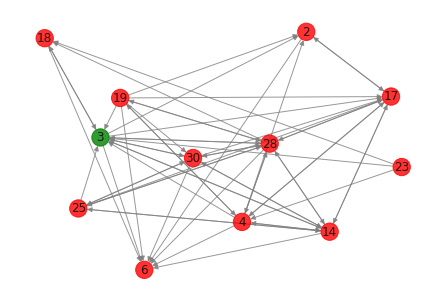

In [116]:
def creer_vect_couleur(G, noeuds_colores):
    node_color = []
    for node in list(G.nodes()):
        if node in noeuds_colores :
            node_color.append('green')
        else:
            node_color.append('red')
    return node_color

pos= nx.spring_layout(EgoGraph, k=0.9, iterations=20, seed=1)
node_color = creer_vect_couleur(EgoGraph, [num_ego])
nx.draw(EgoGraph, with_labels=True, node_size=300, node_color=node_color,
        alpha=0.8, edge_color = "gray", pos=pos)
plt.show()

In [117]:
#Method 2 : The networkx function to extract the ego graph of i
EgoGraph = nx.ego_graph(EgoTotal, num_ego, undirected=True) 
#DONT'T FORGET THE OPTION undirected : if True use both  in and out neighbors for directed graphs
print(nx.info(EgoGraph))

Name: 
Type: DiGraph
Number of nodes: 12
Number of edges: 59
Average in degree:   4.9167
Average out degree:   4.9167


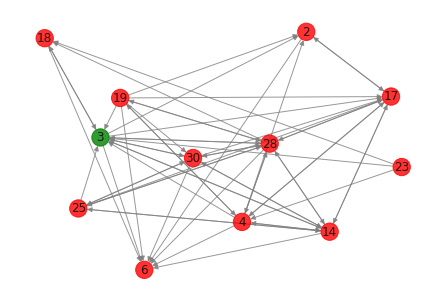

In [118]:
node_color = creer_vect_couleur(EgoGraph, [num_ego])
nx.draw(EgoGraph, with_labels=True, node_size=300, node_color=node_color,
        alpha=0.8, edge_color = "gray", pos=pos)
plt.show()

<mark><b>ATTENTION :</b></mark> ne pas oublier l'option `undirected = True` (qui permet d'utiliser à la fois les voisins entrants et sortants pour les graphes orientés). Si vous l'oubliez, vous ne garderez pas les voisins qui ont simplement un lien entrant vers 3. Par exemple le noeud 25 (cf. ci-dessous). 

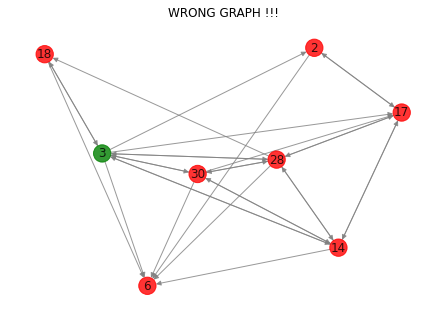

In [126]:
#Method 2 : The networkx function to extract the ego graph of i
EgoGraph_wrong = nx.ego_graph(EgoTotal, num_ego, undirected=False) ###### ERRORRRRRRRRR
#DONT'T FORGET THE OPTION undirected : if True use both  in and out neighbors for directed graphs
node_color = creer_vect_couleur(EgoGraph_wrong, [num_ego])
nx.draw(EgoGraph_wrong, with_labels=True, node_size=300, node_color=node_color,
        alpha=0.8, edge_color = "gray", pos=nx.spring_layout(EgoGraph, k=0.9, iterations=20, seed=1))
plt.title("WRONG GRAPH !!!")
plt.show()


Pas de donnée d'attribut pour les edges. 

In [120]:
# view edges 
print(EgoGraph.edges(data=True))

[(2, 6, {}), (2, 17, {}), (3, 2, {}), (3, 6, {}), (3, 14, {}), (3, 17, {}), (3, 18, {}), (3, 28, {}), (3, 30, {}), (4, 2, {}), (4, 3, {}), (4, 6, {}), (4, 14, {}), (4, 17, {}), (4, 19, {}), (4, 28, {}), (14, 3, {}), (14, 4, {}), (14, 6, {}), (14, 17, {}), (14, 25, {}), (14, 28, {}), (14, 30, {}), (17, 2, {}), (17, 4, {}), (17, 14, {}), (17, 28, {}), (18, 3, {}), (18, 6, {}), (19, 2, {}), (19, 3, {}), (19, 4, {}), (19, 6, {}), (19, 17, {}), (19, 28, {}), (19, 30, {}), (23, 3, {}), (23, 4, {}), (23, 18, {}), (25, 3, {}), (25, 14, {}), (25, 17, {}), (25, 28, {}), (25, 30, {}), (28, 3, {}), (28, 4, {}), (28, 6, {}), (28, 14, {}), (28, 17, {}), (28, 18, {}), (28, 19, {}), (28, 25, {}), (28, 30, {}), (30, 3, {}), (30, 6, {}), (30, 14, {}), (30, 17, {}), (30, 25, {}), (30, 28, {})]


## Subset graph: ~~offline-only, online-only,~~ without Ego

##### Remove Ego from the graph

Afin d'améliorer la visualisation, nous refaisons le graphe sans Ego car Ego a des relations avec tout le monde, ce qui correspond à une information redondante. Pour cela, nous faisons une copie du graphe précédent pour commencer. 

In [122]:
# Graph without Ego
EgoGraph_noEgo = EgoGraph.copy()
EgoGraph_noEgo.remove_node(num_ego)
# View results
print(nx.info(EgoGraph_noEgo))

Name: 
Type: DiGraph
Number of nodes: 11
Number of edges: 44
Average in degree:   4.0000
Average out degree:   4.0000


##### Exercise: now, visualize it with the same layout as EgoGraph

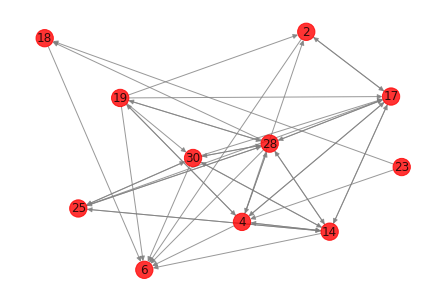

In [123]:
nx.draw(EgoGraph_noEgo, with_labels=True, node_size=300, node_color=node_color,
        alpha=0.8, edge_color = "gray", pos=pos)
plt.show()

## Personal network composition indicators

Variables quantitatives : distribution de la variable. 

- La distribution de l'âge est concentrée sur des individus avec moins de 10 ans d'expérience. Une partie non négligeable des avocats a également autour de 20 ans d'ancienneté. 
- La distribution d'âge des avocats est centrée autour de 35 ans. 

In [129]:
import seaborn as sns 

def kernel_density(df, col):
    sns.displot(df, x=col, kind="kde")

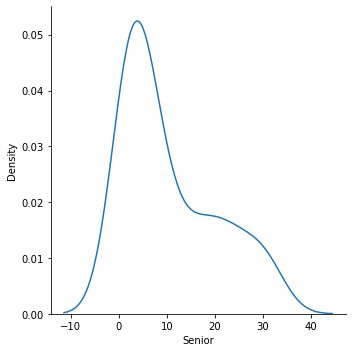

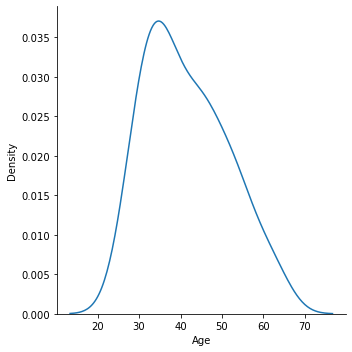

In [130]:
variables = ['Senior', 'Age']
for var in variables:
    kernel_density(alters,var)

Variables qualitatives. 

- Pour status, spec et school, l'IQV est proche de 1, c'est-à-dire que toutes ces catégories sont à peu près équitablement représentées. 
- C'est moins le cas pour Gender et Office où le score est un peu plus bas (autour de 0,7).

In [128]:
variables = ['Status', 'Gender', 'Office', 'Spec', 'School']

print('Blau index\n')
for var in variables:
    print(var,": ",blau(alters, var))
    
print('\nIndex of Qualitative Variation\n')
for var in variables:
    k = len(list(alters[var].unique()))
    blau(alters, var)*(k/(k-1))
    print(var,"(k =",k,") :",blau(alters, var)*(k/(k-1)))
    
print('\nHerfindahl-Hirschman index \n')
for var in variables:
    print(var,": ",1 - blau(alters, var))

Blau index

Status :  0.5
Gender :  0.38204081632653053
Office :  0.4604081632653061
Spec :  0.48979591836734704
School :  0.6399999999999999

Index of Qualitative Variation

Status (k = 2 ) : 1.0
Gender (k = 2 ) : 0.7640816326530611
Office (k = 3 ) : 0.6906122448979591
Spec (k = 2 ) : 0.9795918367346941
School (k = 3 ) : 0.9599999999999999

Herfindahl-Hirschman index 

Status :  0.5
Gender :  0.6179591836734695
Office :  0.5395918367346939
Spec :  0.510204081632653
School :  0.3600000000000001


## Structural measures

##### In principle, all structural measures can be calculated on a personal / ego network. Just be aware of graph type and relevance of each measure (par ex. reciprocity is not meaningful in un undirected graph).

### Cohesion (density)

In [135]:
print("Densité graphe orienté AVEC Ego :",nx.density(EgoGraph))

EgoGraphUG = nx.DiGraph.to_undirected(EgoGraph)

print("Densité graphe non orienté AVEC Ego :",nx.density(EgoGraphUG))

print("Densité graphe orienté SANS Ego :",nx.density(EgoGraph_noEgo))

EgoGraphUG_noEgo = nx.DiGraph.to_undirected(EgoGraph_noEgo)

print("Densité graphe non orienté avec Ego :",nx.density(EgoGraphUG_noEgo))

Densité graphe orienté AVEC Ego : 0.44696969696969696
Densité graphe non orienté AVEC Ego : 0.6212121212121212
Densité graphe orienté SANS Ego : 0.4
Densité graphe non orienté avec Ego : 0.5454545454545454


**Rappel** : Il s'agit du ratio du nombre de liens qui existent sur ceux qui pourraient exister. Elle est élevée pour un réseau dense et est faible pour un réseau peu dense (ou *sparse*, typiquement un réseau social). 

$$Density=\begin{cases}
\frac{L}{n(n-1)} & \text{ unoriented graphes} \\
\frac{L}{\frac{(n-1)}{2}} & \text{ oriented graphes} 
\end{cases}
$$

La densité du graphe orienté avec Ego est de 0,44. C'est assez élevé. Si on retire l'individu Ego, la densité est rendue plus faible (0,4) car par définition Ego contenait était concerné par de nombreux liens dans le graphe précédent. 

### Basic connectivity measures

Il n'y a pas de noeud isolé, c'est logique car on s'intéresse à l'ensemble du réseau concentré autour d'Ego

In [137]:
### find isolates (components consisting in 1 node)
print(list(nx.isolates(EgoGraph)))
print(list(nx.isolates(EgoGraph_noEgo)))


[]
[]


In [140]:
# is the graph connected?
print(nx.is_strongly_connected(EgoGraph)) # "strongly" because it is a digraph
# with an undirected graph, nx.is_connected(G)

# if "strongly" is false, try with "weakly":
print(nx.is_weakly_connected(EgoGraph))

# is the graph connected?
print(nx.is_strongly_connected(EgoGraph_noEgo)) # "strongly" because it is a digraph
# with an undirected graph, nx.is_connected(G)

# if "strongly" is false, try with "weakly":
print(nx.is_weakly_connected(EgoGraph_noEgo))


False
True
False
True


**Rappel** : Un *walk* (chemin en français) est une séquence de sommets qui se suivent en suivant les arêtes. Un *path* (une chaîne en français), est un *walk* pour lequel chaque noeud n'apparaît qu'une fois. Ainsi, un *path* est en particulier un *walk*.

- Avec ou sans Ego, le graphe **n'est pas connecté de manière directe**. C'est à dire qu'il n'existe pas de *walk* (ni de *path* du coup) entre tous les noeuds en suivant la direction des liens. 
- En revanche, avec ou sans Ego, il **est pas connecté de manière faible** cela signifique qu'il existe un `walk` entre tous les noeuds, même indépendamment de la direction des liens. 

In [142]:
## diameter
# because graph is not strongly connected (infinite distances)
# we need to take its undirected representation
#print(nx.diameter(ELfriendUG))
def calculer_diametre(G):
    if nx.is_directed(G):
        if not nx.is_weakly_connected(G):
            print("Calcul du diamètre impossible car le graphe n'est pas connecté.")
        else:
            UG = nx.DiGraph.to_undirected(G)
            print("Diamètre :",nx.diameter(UG))   
    else:
        if not nx.is_connected(G):
            print("Calcul du diamètre impossible car le graphe n'est pas connecté.")
        else:
            UG = G.copy()   
            print("Diamètre :",nx.diameter(UG))

In [145]:
calculer_diametre(EgoGraph)
calculer_diametre(EgoGraph_noEgo)

Diamètre : 2
Diamètre : 3


**Rappel**  : Le diamètre correspond à la distance la plus grande possible qui puisse exister entre deux sommets, la distance entre deux sommets étant définie comme le plus court chemin entre deux sommets. 

La diamètre est un peu plus élevé dans le Graphe sans Ego (3) qu'avec (2), ce qui signifie que, sans lui, les relations sont plus indirectes et le graphe est moins connecté. Il faut plus de liens pour mettre en relations deux noeuds. C'est logique.

In [146]:
## average shortest path length
def calculer_shortest_path_length(G):
    if nx.is_directed(G):
        if not nx.is_weakly_connected(G):
            print("Calcul du chemin le plus court impossible car le graphe n'est pas connecté.")
        else:
            UG = nx.DiGraph.to_undirected(G)
            print("Longueur du chemin le plus court :",nx.average_shortest_path_length(UG))   
    else:
        if not nx.is_connected(G):
             print("Calcul du chemin le plus court impossible car le graphe n'est pas connecté.")
        else:
            UG = G.copy()   
            print("Longueur du chemin le plus court :",nx.average_shortest_path_length(UG))

In [148]:
calculer_shortest_path_length(EgoGraph)
calculer_shortest_path_length(EgoGraph_noEgo)

Longueur du chemin le plus court : 1.378787878787879
Longueur du chemin le plus court : 1.490909090909091


**Rappel** : La longueur moyenne du chemin le plus court (*average path length*, A.P.L.) correspond à la distance moyenne entre toutes les paires de noeuds. C'est une mesure moins sensible aux *outliers* que le diamètre. Si les chemins sont courts, l'information dans le réseau met peu de temps à circuler. 

La longueur du chemin le plus court est un peu plus élevée dans le Graphe sans Ego (1,49) qu'avec (1,37), ce qui signifie que, sans lui, les relations sont plus indirectes et le graphe est moins connecté. Il faut plus de liens pour mettre en relations deux noeuds. C'est logique. 

In [155]:
### find cliques 
cliques = list(nx.find_cliques(EgoGraphUG))
print(cliques)
print("Nombre de cliques : ", len(cliques))
from statistics import mean
print("Longueur moyenne des cliques : ", mean([len(col) for col in cliques]))

[[3, 2, 19, 4, 17], [3, 2, 19, 4, 6], [3, 28, 17, 19, 4], [3, 28, 17, 19, 30], [3, 28, 17, 14, 25, 30], [3, 28, 17, 14, 4], [3, 28, 6, 18], [3, 28, 6, 4, 19], [3, 28, 6, 4, 14], [3, 28, 6, 30, 19], [3, 28, 6, 30, 14], [3, 23, 18], [3, 23, 4]]
Nombre de cliques :  13
Longueur moyenne des cliques :  4.6923076923076925


**Rappel** : Un *clique* est un sous-ensemble de noeuds où toutes les paires de noeuds sont directement connectées.  Les cliques permettent de capturer des différences de cohésion entre différentes parties du réseau. 

Le graphe concentré comporte 13 cliques (sous-ensembles connectés). Ils sont d'une taille moyenne de (4,7 individus).

### Local structures

In [156]:
##### Reciprocity (only interesting in digraph; not relevant in undirected graphs)
nx.reciprocity(EgoGraph)

0.6101694915254238

**Rappel** : Reciprocity = $\frac{N\text{ reciprocated ties}}{N\text{ ties}}$.
La notion de réciprocité s'applique uniquement pour les graphes orientés, c'est bien le cas ici.

61 % des liens du réseau d'Ego sont réciproques. 

In [164]:
##### Transitivity
print(nx.transitivity(EgoGraph)) # this is the global clustering coefficient

0.5608974358974359


**Rappel** : La *transitivity* est le rapport entre le nombre de triades transitives et le nombre de triades possiblement transitives : 
 $$ \text{transitivity }= \frac{N \text{ transitive triads}}{N \text{ potentially transitive triads}}
$$
La transitivité est forte quand les gens sont reliés entre eux par des intermédiaires, comme selon l'adage "les amis de mes amis sont mes amis". 

Ici, la part de transitivité des liens du réseau d'Ego est de 56 %, un peu plus faible que la réciprocité mais relativement forte. Il y a donc un certain nombre de triades transitives dans le réseau d'Ego.

In [158]:
# Clustering
print(nx.clustering(EgoGraph))  # measure is by node (local clustering coefficient)

{2: 0.5357142857142857, 3: 0.43564356435643564, 4: 0.5161290322580645, 6: 0.5178571428571429, 14: 0.6388888888888888, 17: 0.5887096774193549, 18: 0.5, 19: 0.6176470588235294, 23: 0.5, 25: 0.94, 28: 0.5265486725663717, 30: 0.6862745098039216}


In [159]:
## take the average:
print(nx.average_clustering(EgoGraph)) 

0.583617736057333


**Rappel** : Le coefficient de groupement local (*local clustering coefficient*) mesure la cohésion dans le voisinage d'un noeud (combien de ses amis sont amis entre eux). Pour chaque noeud $i$,
$$
CI_i=\frac{\text{number existing ties between i's friends}}{\text{number possible ties between i's friends}}
$$

On fait ici sa moyenne. 

La moyenne du *local clustering coefficient* est de 58 %. C'est assez proche de la transitivité globale.

### Centrality

In [160]:
# degree centrality (without considering directed edges)
# sur un graphe orienté il fait la somme des in et out
centra_degree = nx.degree_centrality(EgoGraph)
dict(sorted(centra_degree.items(), key=lambda item: item[1], reverse=True))

{28: 1.4545454545454546,
 3: 1.3636363636363638,
 14: 1.1818181818181819,
 4: 1.0909090909090908,
 17: 1.0909090909090908,
 30: 1.0,
 19: 0.8181818181818182,
 6: 0.7272727272727273,
 25: 0.7272727272727273,
 2: 0.5454545454545454,
 18: 0.4545454545454546,
 23: 0.2727272727272727}

**Rappel** La centralité de degrés montrent qui sont les noeuds les plus actifs, qui ont le plus de connexions. Ils jouent un rôle de connecteur, de *hub*.

Etonnamment, l'individu **28** est encore plus central qu'Ego dans son propre réseau. Il est en effet respectivement quatrième et premier en centralité de degré entrant et sortant (cf. ci-dessous). Il possède également de nombreux voisins. 

In [161]:
# indegree centrality (incoming ties)
centra_indegree = nx.in_degree_centrality(EgoGraph)
dict(sorted(centra_indegree.items(), key=lambda item: item[1], reverse=True))

{3: 0.7272727272727273,
 6: 0.7272727272727273,
 17: 0.7272727272727273,
 28: 0.6363636363636364,
 14: 0.5454545454545454,
 4: 0.4545454545454546,
 30: 0.4545454545454546,
 2: 0.36363636363636365,
 18: 0.2727272727272727,
 25: 0.2727272727272727,
 19: 0.18181818181818182,
 23: 0.0}

In [162]:
# outdegree centrality (outgoing ties)
centra_outdegree = nx.out_degree_centrality(EgoGraph)
dict(sorted(centra_outdegree.items(), key=lambda item: item[1], reverse=True))

{28: 0.8181818181818182,
 3: 0.6363636363636364,
 4: 0.6363636363636364,
 14: 0.6363636363636364,
 19: 0.6363636363636364,
 30: 0.5454545454545454,
 25: 0.4545454545454546,
 17: 0.36363636363636365,
 23: 0.2727272727272727,
 2: 0.18181818181818182,
 18: 0.18181818181818182,
 6: 0.0}

In [163]:
# Betweenness centrality ordered (descending importance of betweenness)
betweenness = nx.betweenness_centrality(EgoGraph)
dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))

# Betweenness values are normalized by 2/((n-1)(n-2)) for graphs,
# and 1/((n-1)(n-2)) for directed graphs, where n is the number of nodes 

{28: 0.1546969696969697,
 3: 0.15196969696969698,
 17: 0.10106060606060606,
 4: 0.06303030303030303,
 14: 0.05742424242424242,
 30: 0.016515151515151514,
 19: 0.004545454545454545,
 18: 0.00303030303030303,
 2: 0.0022727272727272726,
 6: 0.0,
 23: 0.0,
 25: 0.0}

**Rappel** : la centralité de *betweeness* permet d'identifier les individus qui jouent le rôle de "ponts" au sein du network. Cela peut être une information d'importance de l'individu au sein du réseau car il permet de l'étendre.

On voit que l'individu 28 est aussi l'individu dont la centralité de *betweenness* est la plus forte. 

## Multigraph resulting from combining advice, friendship and cowork.

In [5]:
# use pandas to import edgelist as a table
EgoEdges = pd.read_table('Ego210_Edges.txt', sep=',')
EgoEdges.head()

,V1,V2,Type
0,210,25,1
1,210,27,1
2,210,31,1
3,210,34,1
4,210,35,1


On va créer le nouveau EgoGraph.

In [6]:
# generate graph from pandas edgelist
# it is an undirected multigraph
# a 'multigraph' accepts multiple types of ties (here, online and offline)

Ego210 = nx.from_pandas_edgelist(EgoEdges, 'V1', 'V2', edge_attr ='Type', create_using=nx.MultiGraph()) 
print(nx.info(Ego210))

Name: 
Type: MultiGraph
Number of nodes: 51
Number of edges: 114
Average degree:   4.4706


**Remarque** : Si on l'avait chargé comme graphe normal, ce qui change c'est le nombre d'*edges* qui diminue. Il y en a désormais 71 au lieu de 114. 

In [7]:
# Note: if we had created it as a simple undirected graph, networkx would have omitted multiple ties
test = nx.from_pandas_edgelist(EgoEdges, 'V1', 'V2', create_using=nx.Graph()) 
print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 71
Average degree:   2.7843


Revenons à nos données de MultiGraph.

In [8]:
# match nodes of graph with attributes of nodes
NodeData = nodes.set_index('ID').to_dict('index').items()
Ego210.add_nodes_from(NodeData)

# view results
print(Ego210.nodes(data=True))

[(210, {'Qualification': 1, 'Gender': 1, 'Multiplexity': 3, 'Support': 2, 'Proximity': 4}), (25, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 1, 'Support': 1, 'Proximity': 1}), (27, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (31, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 1, 'Support': 1, 'Proximity': 2}), (34, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (35, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (39, {'Qualification': 4, 'Gender': 1, 'Multiplexity': 3, 'Support': 2, 'Proximity': 2}), (95, {'Qualification': 1, 'Gender': 2, 'Multiplexity': 3, 'Support': 2, 'Proximity': 3}), (106, {'Qualification': 2, 'Gender': 2, 'Multiplexity': 3, 'Support': 1, 'Proximity': 3}), (110, {'Qualification': 4, 'Gender': 2, 'Multiplexity': 3, 'Support': 1, 'Proximity': 1}), (112, {'Qualification': 6, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 1}), (124,

In [9]:
# view edges
print(Ego210.edges(data=True))

[(210, 25, {'Type': 1}), (210, 27, {'Type': 1}), (210, 27, {'Type': 2}), (210, 31, {'Type': 1}), (210, 34, {'Type': 1}), (210, 34, {'Type': 2}), (210, 35, {'Type': 1}), (210, 35, {'Type': 2}), (210, 39, {'Type': 1}), (210, 39, {'Type': 2}), (210, 95, {'Type': 1}), (210, 95, {'Type': 2}), (210, 106, {'Type': 1}), (210, 106, {'Type': 2}), (210, 110, {'Type': 1}), (210, 110, {'Type': 2}), (210, 112, {'Type': 1}), (210, 112, {'Type': 2}), (210, 124, {'Type': 1}), (210, 124, {'Type': 2}), (210, 132, {'Type': 1}), (210, 132, {'Type': 2}), (210, 140, {'Type': 1}), (210, 140, {'Type': 2}), (210, 260, {'Type': 1}), (210, 260, {'Type': 2}), (210, 270, {'Type': 1}), (210, 290, {'Type': 1}), (210, 317, {'Type': 1}), (210, 317, {'Type': 2}), (210, 320, {'Type': 1}), (210, 330, {'Type': 1}), (210, 330, {'Type': 2}), (210, 340, {'Type': 1}), (210, 340, {'Type': 2}), (210, 350, {'Type': 1}), (210, 350, {'Type': 2}), (210, 360, {'Type': 1}), (210, 370, {'Type': 1}), (210, 370, {'Type': 2}), (210, 410, 

Nous utilisons désormais un mode de visualisation particulier, un peu plus complexe que d'habitude, car un simple `nx.draw` ne permet pas de visualiser les double liens. Nous utilisons une disposition des noeuds en `spring_layout`. Les liens doubles sont représentés courbés. 

Le **noeud 210** est placé automatiquement au centre par l'algorithme car il correspond à celui qui a le plus de lien (en tant que noeud *Ego*). 

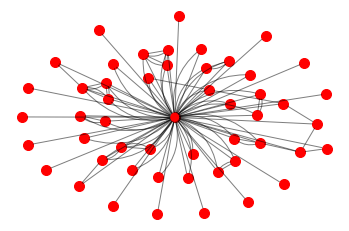

In [10]:
# Visualization

# define layout
pos = nx.spring_layout(Ego210, seed=1)
# draw nodes according to layoabsut
nx.draw_networkx_nodes(Ego210, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", #multi-graph but not oriented
                                color='black',
                                alpha=0.5,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                #arc3,rad=rrr : permet de faire des courbes plutôt que des lignes
                                #au lieu de donner une même valeur pour toutes les courbes, je donne
                                #une valeur différente pour type 1 et type 2. 
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),
                                ),
                )
plt.axis('off')
plt.show()

Faisons le même graphique en distinguant les liens selon leur type (bleu de type 1 offline et vert de type 2 online). 

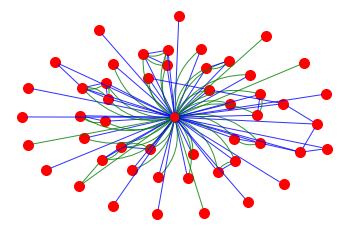

In [11]:
# Visualization with differences by types

#Colors : blue for offline and green for online
edge_color = []
for edge in list(Ego210.edges(data=True)):
    if list(edge[2].values())==[1]:
        edge_color.append('blue')
    else:
        edge_color.append('green')
        
# keep the same layout as before ("pos") to compare
# draw nodes according to layoabsut
nx.draw_networkx_nodes(Ego210, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()


for i in range(len(Ego210.edges)):
    e = list(Ego210.edges)[i]
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", #multi-graph but not oriented
                                color=edge_color[i],
                                alpha=0.8,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                #arc3,rad=rrr : permet de faire des courbes plutôt que des lignes
                                #au lieu de donner une même valeur pour toutes les courbes, je donne
                                #une valeur différente pour type 1 et type 2. 
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),
                                ),
                )
plt.axis('off')
plt.show()

## Subset graph: offline-only, online-only, without Ego

##### Offline ties

Je me restreins ici au sous-graphe des liens de type 1 (offline). 

In [12]:
## Subset graph: take only offline ties

# take subset of relevant edges
offline = [(u, v) for (u, v, d) in Ego210.edges(data=True) if d["Type"] ==1]

# create graph
Ego210Offline = nx.Graph(offline)
print(nx.info(Ego210Offline))

Name: 
Type: Graph
Number of nodes: 46
Number of edges: 65
Average degree:   2.8261


On l'associe avec notre liste initiale de noeuds pour considérer les noeuds isolés, ce qui permet de comparer avec les noeuds d'origine. 

In [13]:
# match with nodes table to add isolates
Ego210Offline.add_nodes_from(NodeData)

# view results
print(nx.info(Ego210Offline))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 65
Average degree:   2.5490


Les liens sont moins nombreux et il n'existe plus de noeud double. 

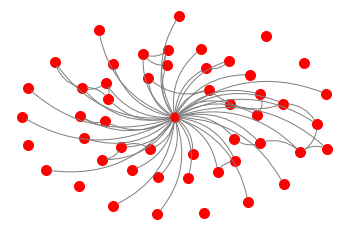

In [15]:
# Visualization

# keep the same layout as before ("pos") to compare
# draw nodes according to this layout
nx.draw_networkx_nodes(Ego210Offline, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210Offline.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-",
                                color='gray',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3"),
                                )
plt.axis('off')
plt.show()

##### Exercise: now, repeat the same for online ties

Nous réitérons la procédure en nous restreignant au sous-graphe des liens de type 2 (online). 

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 49
Average degree:   2.7222
Name: 
Type: Graph
Number of nodes: 51
Number of edges: 49
Average degree:   1.9216


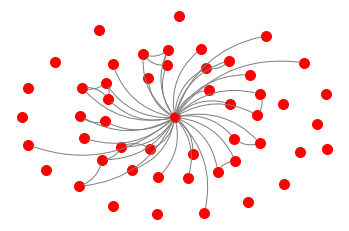

In [16]:
## Subset graph: take only offline ties

# take subset of relevant edges
online = [(u, v) for (u, v, d) in Ego210.edges(data=True) if d["Type"] ==2]

# create graph
Ego210Online = nx.Graph(online)
print(nx.info(Ego210Online))

# match with nodes table to add isolates
Ego210Online.add_nodes_from(NodeData)

# view results
print(nx.info(Ego210Online))

# Visualization

# keep the same layout as before ("pos") to compare
# draw nodes according to this layout
nx.draw_networkx_nodes(Ego210Online, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210Online.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-",
                                color='gray',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3"),
                                )
plt.axis('off')
plt.show()

##### Remove Ego from the graph

Afin d'améliorer la visualisation, nous refaisons le graphe sans Ego car Ego a des relations avec tout le monde, ce qui correspond à une information redondante. Pour cela, nous faisons une copie du graphe précédent pour commencer. 

In [17]:
# Graph without Ego
Ego210_noEgo = Ego210.copy()
Ego210_noEgo.remove_node(210)
# View results
print(nx.info(Ego210_noEgo))

Name: 
Type: MultiGraph
Number of nodes: 50
Number of edges: 34
Average degree:   1.3600


La densité est faible et peut s'interpréter de deux manières : 

1.  Les personnes qui ont des soucis de santé préfèrent probablement garder des relations séparées pour que lleurs contacts ne puissent pas parler entre eux. C'est une sorte de protection. 

2. Il y a aussi un sujet de méthode. Dans l'enquête, on demande à Ego qui sont ses alters (formulé bien sûr autrement) et les relations entre ses alters. Il est aussi possible qu'Ego ne connaisse pas toutes les relations de ses alters et sous-estime les liens entre ces derniers. 

##### Exercise: now, visualize it with the same layout as Ego210

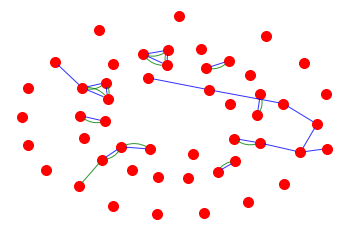

In [18]:
# Visualization with differences by types

#Colors : blue for offline and green for online
edge_color = []
for edge in list(Ego210_noEgo.edges(data=True)):
    if list(edge[2].values())==[1]:
        edge_color.append('blue')
    else:
        edge_color.append('green')
        
# keep the same layout as before ("pos") to compare
# draw nodes according to layoabsut
nx.draw_networkx_nodes(Ego210_noEgo, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()


for i in range(len(Ego210_noEgo.edges)):
    e = list(Ego210_noEgo.edges)[i]
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", #multi-graph but not oriented
                                color=edge_color[i],
                                alpha=0.8,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                #arc3,rad=rrr : permet de faire des courbes plutôt que des lignes
                                #au lieu de donner une même valeur pour toutes les courbes, je donne
                                #une valeur différente pour type 1 et type 2. 
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),
                                ),
                )
plt.axis('off')
plt.show()

##### Weighted graph

L'intérêt de pondérer le graphe est d'analyser la force des liens, par exemple quand le lien est double (en ligne et hors ligne). Même si bien sûr, en tant de Covid, cette interprétation n'est pas forcément la bonne ! On va donc transformer le graphe avec cette idée en tête. 

Le nouveau graph est composé de **51 noeuds** (dont Ego) et de **71 liens** (nombre de liens uniques de `test`). 

L'attribut `weight` du nouveau graphe vaut 1 si le lien apparaît une fois et 2 s'il apparaît 2 fois. 

In [19]:
## Create weighted undirected graph from multigraph
# Idea : each tie has value 2 if it is both online and offline, 1 otherwise
# We can interpret multiplexity as tie strength

Ego210WUG = nx.Graph()

for u,v,data in Ego210.edges(data=True):
    w = 1   
    if Ego210WUG.has_edge(u,v):
        Ego210WUG[u][v]['weight'] += w
    else:
        Ego210WUG.add_edge(u, v, weight=w)

print(nx.info(Ego210WUG))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 71
Average degree:   2.7843


In [20]:
print(Ego210WUG.edges(data=True))

[(210, 25, {'weight': 1}), (210, 27, {'weight': 2}), (210, 31, {'weight': 1}), (210, 34, {'weight': 2}), (210, 35, {'weight': 2}), (210, 39, {'weight': 2}), (210, 95, {'weight': 2}), (210, 106, {'weight': 2}), (210, 110, {'weight': 2}), (210, 112, {'weight': 2}), (210, 124, {'weight': 2}), (210, 132, {'weight': 2}), (210, 140, {'weight': 2}), (210, 260, {'weight': 2}), (210, 270, {'weight': 1}), (210, 290, {'weight': 1}), (210, 317, {'weight': 2}), (210, 320, {'weight': 1}), (210, 330, {'weight': 2}), (210, 340, {'weight': 2}), (210, 350, {'weight': 2}), (210, 360, {'weight': 1}), (210, 370, {'weight': 2}), (210, 410, {'weight': 2}), (210, 411, {'weight': 2}), (210, 420, {'weight': 1}), (210, 430, {'weight': 1}), (210, 440, {'weight': 1}), (210, 450, {'weight': 1}), (210, 511, {'weight': 2}), (210, 729, {'weight': 1}), (210, 828, {'weight': 2}), (210, 1620, {'weight': 2}), (210, 1719, {'weight': 2}), (210, 1815, {'weight': 1}), (210, 1916, {'weight': 1}), (210, 2113, {'weight': 2}), (2

Afin de visualiser intuitivement les résultats, nous représentons les liens doubles par des segments plus épais que pour les liens faibles.

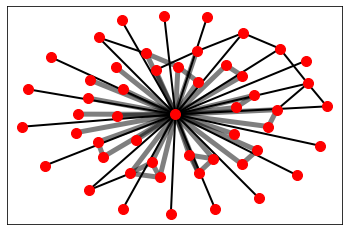

In [21]:
# Visualization

strongTies = [(u, v) for (u, v, d) in Ego210WUG.edges(data=True) if d["weight"] > 1]
weakTies = [(u, v) for (u, v, d) in Ego210WUG.edges(data=True) if d["weight"] <= 1]

pos = nx.spring_layout(Ego210WUG)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Ego210WUG, pos, node_color = 'r', node_size = 100, alpha = 1)

# edges
nx.draw_networkx_edges(Ego210WUG, pos, edgelist=strongTies, width=5, alpha=0.5)  # strong ties
nx.draw_networkx_edges(Ego210WUG, pos, edgelist=weakTies, width=2, alpha=1) # weak ties


## Personal network composition indicators

In [22]:
## Blau index

# recall it is equal to 1 - p1^2 - p2^2 - ... - pk^2

# first create a function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())

# then apply it to the 'alters' table, attribute 'Qualification'
blau(alters, 'Qualification')

0.6624

In [23]:
# NB if you need to see how many/ which categories are represented in a categorical variables
print (alters['Qualification'].unique())

[2 4 1 6 3 5]


In [24]:
# Index of Qualitative Variation
# equal to Blau * k/(k-1)
# (normalized version)
k = len(list(alters['Qualification'].unique()))
print("k :",k)
blau(alters, 'Qualification')*(k/(k-1))

k : 6


0.7948799999999999

In [26]:
# Herfindahl-Hirschman index (HHI)
# equal to 1 - Blau
1 - blau(alters, 'Qualification')

0.3376

#### Exercise: calculate these indexes for the other attributes (Gender, Multiplexity, Support and Proximity)

In [27]:
variables = ['Qualification','Gender','Multiplexity','Support','Proximity']

print('Blau index\n')
for var in variables:
    print(var,": ",blau(alters, var))
    
print('\nIndex of Qualitative Variation\n')
for var in variables:
    k = len(list(alters[var].unique()))
    blau(alters, var)*(k/(k-1))
    print(var,"(k =",k,") :",blau(alters, var)*(k/(k-1)))
    
print('\nHerfindahl-Hirschman index \n')
for var in variables:
    print(var,": ",1 - blau(alters, var))

Blau index

Qualification :  0.6624
Gender :  0.4872000000000001
Multiplexity :  0.54
Support :  0.4351999999999999
Proximity :  0.5751999999999999

Index of Qualitative Variation

Qualification (k = 6 ) : 0.7948799999999999
Gender (k = 2 ) : 0.9744000000000002
Multiplexity (k = 3 ) : 0.81
Support (k = 2 ) : 0.8703999999999998
Proximity (k = 3 ) : 0.8627999999999999

Herfindahl-Hirschman index 

Qualification :  0.3376
Gender :  0.5127999999999999
Multiplexity :  0.45999999999999996
Support :  0.5648000000000001
Proximity :  0.42480000000000007


**Remarque** : Pour `Proximity`, $k = 3$ et non $4$ car la classe $4$ (Intime) non concerne que l'individu ego et non les alters. 

## Structural measures